In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [3]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}
df_events = pd.read_csv("events.csv", dtype=types, low_memory=False)

In [4]:
df = df_events[["person","city","region","country"]]
df = df.loc[(df["city"].isnull() == False) & (df["city"] != "Unknown"),:]

df = df.drop_duplicates(subset='person')

#_df = df_events.loc[(df_events['person'].isin(usuarios)) & (df_events["city"].isnull() == False) & (df_events["city"] != "Unknown") ] 

df2 = df_events[["person","search_term","sku","event","model"]]
dfs = df2.merge(df, on='person')
#coalese o fillna
dfs["country"].value_counts()

Brazil                904742
United States           3399
Argentina                616
Canada                   142
Switzerland              137
Portugal                 103
French Guiana             82
France                    70
Netherlands               63
United Kingdom            61
Poland                    51
Mozambique                36
Romania                   33
Italy                     32
Dominican Republic        29
China                     28
Paraguay                  15
India                     12
Russia                     9
Morocco                    8
Uruguay                    7
Mexico                     6
Turkey                     5
Sri Lanka                  5
Bangladesh                 4
South Africa               4
Venezuela                  3
Name: country, dtype: int64

In [5]:
dfs = dfs.loc[dfs["search_term"].isnull() == False]
dfs["search_term"] = dfs['search_term'].apply(lambda x: x.lower())
dfs["search_term"].value_counts().head(20)

iphone 6          3056
iphone            2653
iphone 6s         2367
iphone 7          1220
iphone 5s         1023
motorola           765
j5                 754
j7                 751
iphone 6 plus      708
s7                 688
s8                 640
iphone se          580
samsung            557
iphone 5           550
iphone 6s plus     537
iphone 7 plus      476
s6                 429
j7 prime           404
moto g5            362
moto g             319
Name: search_term, dtype: int64

In [6]:
search_term = dfs["search_term"].value_counts().head(20)

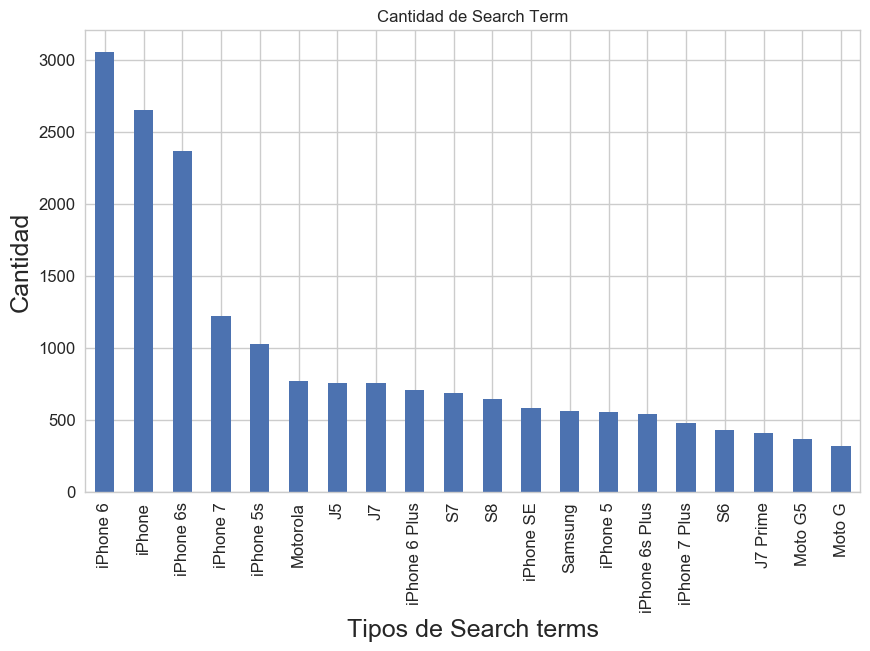

In [7]:
ax = search_term.plot(kind = 'bar', title = "Cantidad de Search Term",figsize =(10,6),legend = False, fontsize = 12)
ax.set_xlabel("Tipos de Search terms", fontsize = 18)
ax.set_ylabel("Cantidad",fontsize = 18)


ax.set_xticklabels(["iPhone 6","iPhone","iPhone 6s","iPhone 7","iPhone 5s","Motorola","J5","J7","iPhone 6 Plus","S7","S8","iPhone SE","Samsung","iPhone 5","iPhone 6s Plus","iPhone 7 Plus","S6","J7 Prime","Moto G5","Moto G"])
plt.show()

In [17]:
dfs_brazil = dfs.loc[dfs["country"] == "Brazil"]
#dfs_brazil["search_term"] = dfs_brazil['search_term'].apply(lambda x: x.lower())
br = dfs_brazil["search_term"].value_counts().head(10)
br.index.tolist()

['iphone 6',
 'iphone',
 'iphone 6s',
 'iphone 7',
 'iphone 5s',
 'motorola',
 'j5',
 'j7',
 'iphone 6 plus',
 's7']

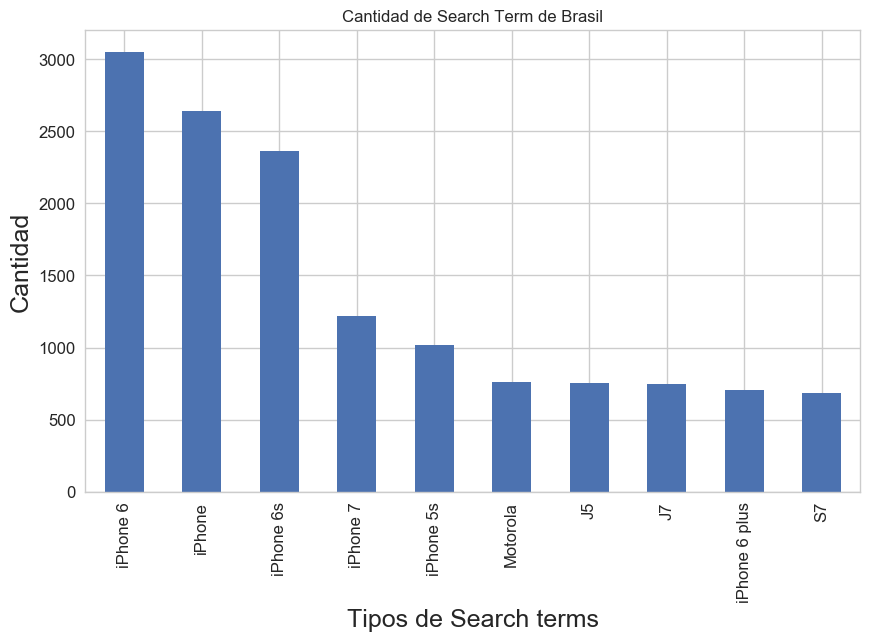

In [24]:


ax = br.plot(kind = 'bar', title = "Cantidad de Search Term de Brasil",figsize =(10,6),legend = False, fontsize = 12)

br_t = ['iPhone 6','iPhone','iPhone 6s','iPhone 7','iPhone 5s','Motorola','J5','J7','iPhone 6 plus','S7']

ax.set_xlabel("Tipos de Search terms", fontsize = 18)
ax.set_ylabel("Cantidad",fontsize = 18)

ax.set_xticklabels(br_t)

plt.show()


## Si solo queresmos ver las search term de brazil, vemos que no cambia respecto a verlo para todos lo paises, por ende no es necesario ver este caso en particular

In [9]:
dfs_usa = dfs.loc[dfs["country"] == "United States"]
dfs_usa["search_term"].value_counts().head(10)

note 3            14
note              11
samsung            8
iphone 5s          6
motorola           6
sony               4
iphone 6           4
iphone             3
moto g4 plus       3
samung celular     3
Name: search_term, dtype: int64

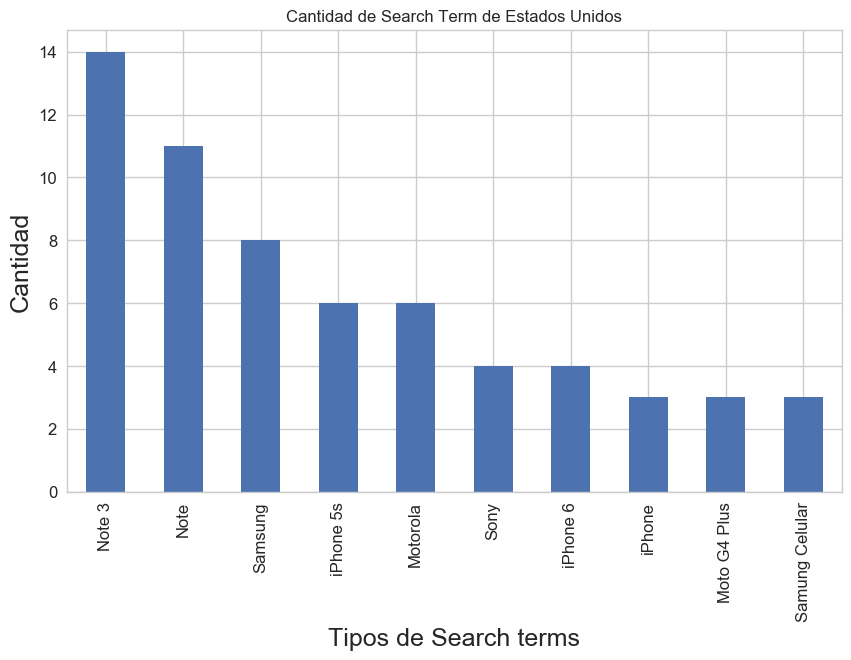

In [23]:
search_term_usa = dfs_usa["search_term"].value_counts().head(10)
ax = search_term_usa.plot(kind = 'bar', title = "Cantidad de Search Term de Estados Unidos",figsize =(10,6),legend = False, fontsize = 12)
ax.set_xlabel("Tipos de Search terms", fontsize = 18)
ax.set_ylabel("Cantidad",fontsize = 18)

ax.set_xticklabels(["Note 3","Note","Samsung","iPhone 5s", "Motorola","Sony","iPhone 6","iPhone","Moto G4 Plus","Samung Celular"])

plt.show()

In [45]:
dfs["region"].value_counts().head()


Sao Paulo         314156
Minas Gerais       96995
Rio de Janeiro     83653
Bahia              69413
Pernambuco         36651
Name: region, dtype: int64

In [46]:
dfs_sp = dfs.loc[dfs["region"] == "Sao Paulo"]
sao_paulo = dfs_sp["search_term"].value_counts().head(10)

lista = sao_paulo.index.tolist()
sao_paulo = sao_paulo.sort_index()
sao_paulo

Iphone       487
Iphone 6     369
Iphone 6s    295
Samsung      254
iPhone       300
iPhone 6     468
iPhone 6s    253
iphone       352
iphone 6     326
iphone 6s    341
Name: search_term, dtype: int64

In [47]:
dfs_mn = dfs.loc[(dfs["region"] == "Minas Gerais")&(dfs["search_term"].isin(lista))]
minas_gerais = dfs_mn["search_term"].value_counts().head(10).sort_index()
minas_gerais

Iphone       60
Iphone 6     64
Iphone 6s    37
Samsung      41
iPhone       35
iPhone 6     50
iPhone 6s    56
iphone       39
iphone 6     55
iphone 6s    93
Name: search_term, dtype: int64

In [48]:
dfs_rj = dfs.loc[(dfs["region"] == "Rio de Janeiro")&(dfs["search_term"].isin(lista))]
rio_de_janeiro = dfs_rj["search_term"].value_counts().head(10).sort_index()
rio_de_janeiro

Iphone       160
Iphone 6      78
Iphone 6s     46
Samsung       21
iPhone        77
iPhone 6      80
iPhone 6s     96
iphone        54
iphone 6     150
iphone 6s     62
Name: search_term, dtype: int64

In [49]:
dfs_ba = dfs.loc[(dfs["region"] == "Bahia")&(dfs["search_term"].isin(lista))]
bahia = dfs_ba["search_term"].value_counts().head(10).sort_index()
bahia

Iphone       83
Iphone 6     49
Iphone 6s    45
Samsung      26
iPhone       45
iPhone 6     49
iPhone 6s    34
iphone       75
iphone 6     43
iphone 6s    42
Name: search_term, dtype: int64

In [50]:
dfs_per = dfs.loc[(dfs["region"] == "Pernambuco")&(dfs["search_term"].isin(lista))]
pernambuco = dfs_per["search_term"].value_counts().head(10).sort_index()
pernambuco

Iphone       52
Iphone 6     15
Iphone 6s    14
Samsung      29
iPhone       10
iPhone 6     22
iPhone 6s    35
iphone       31
iphone 6     11
iphone 6s    17
Name: search_term, dtype: int64

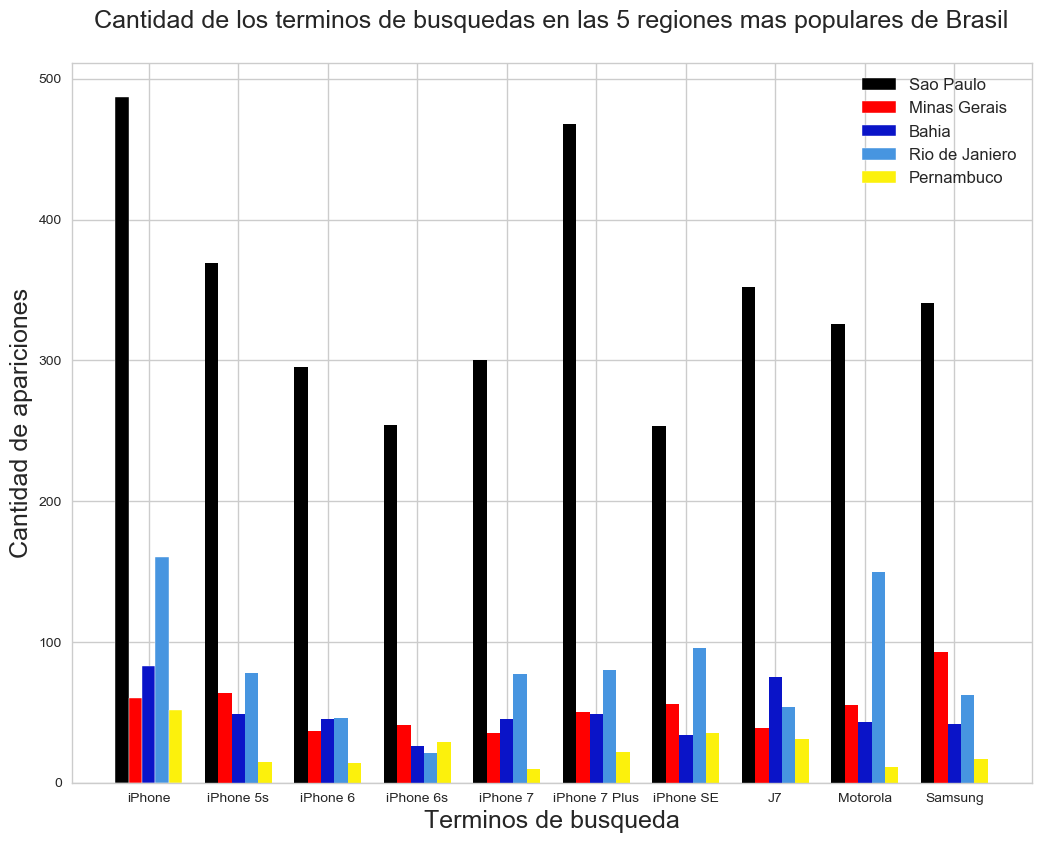

In [51]:
X = np.arange (len(lista))
Y1 = sao_paulo.values
Y2 = minas_gerais.values
Y3 = bahia.values
Y4 = rio_de_janeiro.values
Y5 = pernambuco.values


plt.axes([0.025,0.025,1.5,1.5])
plt.bar(X-0.3 ,Y1,facecolor = "#000000",label = "Sao Paulo", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X-0.15,Y2,facecolor = "#ff0000",label = "Minas Gerais", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X ,Y3,facecolor = "#0a14c8",label = "Bahia", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X+0.15,Y4,facecolor = "#4795e0",label = "Rio de Janiero", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X+0.3 ,Y5,facecolor = "#fcf10c",label = "Pernambuco", width = 0.15, align = "center",edgecolor = "white")

nombres = ["iPhone","iPhone 5s","iPhone 6","iPhone 6s","iPhone 7","iPhone 7 Plus","iPhone SE","J7","Motorola","Samsung"]

plt.xticks(X,nombres,fontsize = 10)
plt.xlabel("Terminos de busqueda",fontsize = 18)
plt.ylabel('Cantidad de apariciones', fontsize = 18)

plt.title('Cantidad de los terminos de busquedas en las 5 regiones mas populares de Brasil\n', fontsize = 18)

plt.legend(loc="upper right",fontsize = 12)
plt.show()

In [52]:
dfs_c = dfs.loc[(dfs["event"] == "conversion")&(dfs["country"] == "Brazil")]
models = dfs_c["region"].value_counts().head(10)
models

Sao Paulo             330
Minas Gerais          107
Rio de Janeiro        101
Bahia                 100
Maranhao               45
Federal District       34
Rio Grande do Sul      30
Pernambuco             26
Ceara                  22
Mato Grosso do Sul     20
Name: region, dtype: int64

In [53]:
models_sp = dfs_c.loc[dfs_c["region"] == "Sao Paulo"]
sao_paulo = models_sp["model"].value_counts().head(10)

"""modelos = pd.Series( [0,0,0,0,0,0,0,0,0,0],
    index = ['Samsung Galaxy J5', 'Samsung Galaxy J7', 'Samsung Galaxy S5', 'Samsung Galaxy S5', 'Samsung Galaxy S6 Edge', 'iPhone 5c', 'iPhone 5s', 'iPhone 6',
     'iPhone 6S', 'iPhone SE'])"""
lista = sao_paulo.index.tolist()
sao_paulo = sao_paulo.sort_index()
sao_paulo

Samsung Galaxy J5          24
Samsung Galaxy J7          11
Samsung Galaxy J7 Prime     8
Samsung Galaxy S5           7
Samsung Galaxy S6 Edge      9
iPhone 5c                   8
iPhone 5s                  21
iPhone 6                   38
iPhone 6S                  13
iPhone SE                  10
Name: model, dtype: int64

In [54]:
models_mn = dfs_c.loc[(dfs_c["region"] == "Minas Gerais")&(dfs_c["model"].isin(lista))]
minas_gerais = models_mn["model"].value_counts().head(8)

modelos = pd.Series( [0,0],
    index = ["iPhone 5c","iPhone SE"])
minas_gerais  = minas_gerais.append(modelos)
minas_gerais  = minas_gerais.sort_index()
minas_gerais 


Samsung Galaxy J5          8
Samsung Galaxy J7          4
Samsung Galaxy J7 Prime    2
Samsung Galaxy S5          2
Samsung Galaxy S6 Edge     1
iPhone 5c                  0
iPhone 5s                  3
iPhone 6                   4
iPhone 6S                  4
iPhone SE                  0
dtype: int64

In [55]:
models_rj = dfs_c.loc[(dfs_c["region"] == "Rio de Janeiro")&(dfs_c["model"].isin(lista))]
rio_de_janeiro = models_rj["model"].value_counts().head(7)

modelos = pd.Series( [0,0,0],
    index = ["Samsung Galaxy J7 Prime","Samsung Galaxy J7","Samsung Galaxy S6 Edge"])

rio_de_janeiro = rio_de_janeiro.append(modelos)
rio_de_janeiro = rio_de_janeiro.sort_index()
rio_de_janeiro

Samsung Galaxy J5           2
Samsung Galaxy J7           0
Samsung Galaxy J7 Prime     0
Samsung Galaxy S5           2
Samsung Galaxy S6 Edge      0
iPhone 5c                   2
iPhone 5s                  19
iPhone 6                    6
iPhone 6S                   2
iPhone SE                   3
dtype: int64

In [56]:
models_ba = dfs_c.loc[(dfs_c["region"] == "Bahia")&(dfs["model"].isin(lista))]
bahia = models_ba["model"].value_counts().head(7)

modelos = pd.Series( [0,0,0],
    index = ["Samsung Galaxy J7 Prime",'iPhone 6S', 'iPhone SE'])

bahia = bahia.append(modelos)
bahia = bahia.sort_index()
bahia

Samsung Galaxy J5          18
Samsung Galaxy J7           3
Samsung Galaxy J7 Prime     0
Samsung Galaxy S5           1
Samsung Galaxy S6 Edge      2
iPhone 5c                   3
iPhone 5s                   6
iPhone 6                    1
iPhone 6S                   0
iPhone SE                   0
dtype: int64

In [57]:
models_per = dfs_c.loc[(dfs_c["region"] == "Pernambuco")&(dfs["model"].isin(lista))]
pernambuco = models_per["model"].value_counts().head(3)

modelos = pd.Series( [0,0,0,0,0,0,0],
    index = ['Samsung Galaxy J5', 'Samsung Galaxy J7', 'Samsung Galaxy S5', 'Samsung Galaxy S5', 'Samsung Galaxy S6 Edge',
     'iPhone 6S', 'iPhone SE'])


pernambuco = pernambuco.append(modelos)
pernambuco = pernambuco.sort_index()
pernambuco

Samsung Galaxy J5         0
Samsung Galaxy J7         0
Samsung Galaxy S5         0
Samsung Galaxy S5         0
Samsung Galaxy S6 Edge    0
iPhone 5c                 2
iPhone 5s                 5
iPhone 6                  1
iPhone 6S                 0
iPhone SE                 0
dtype: int64

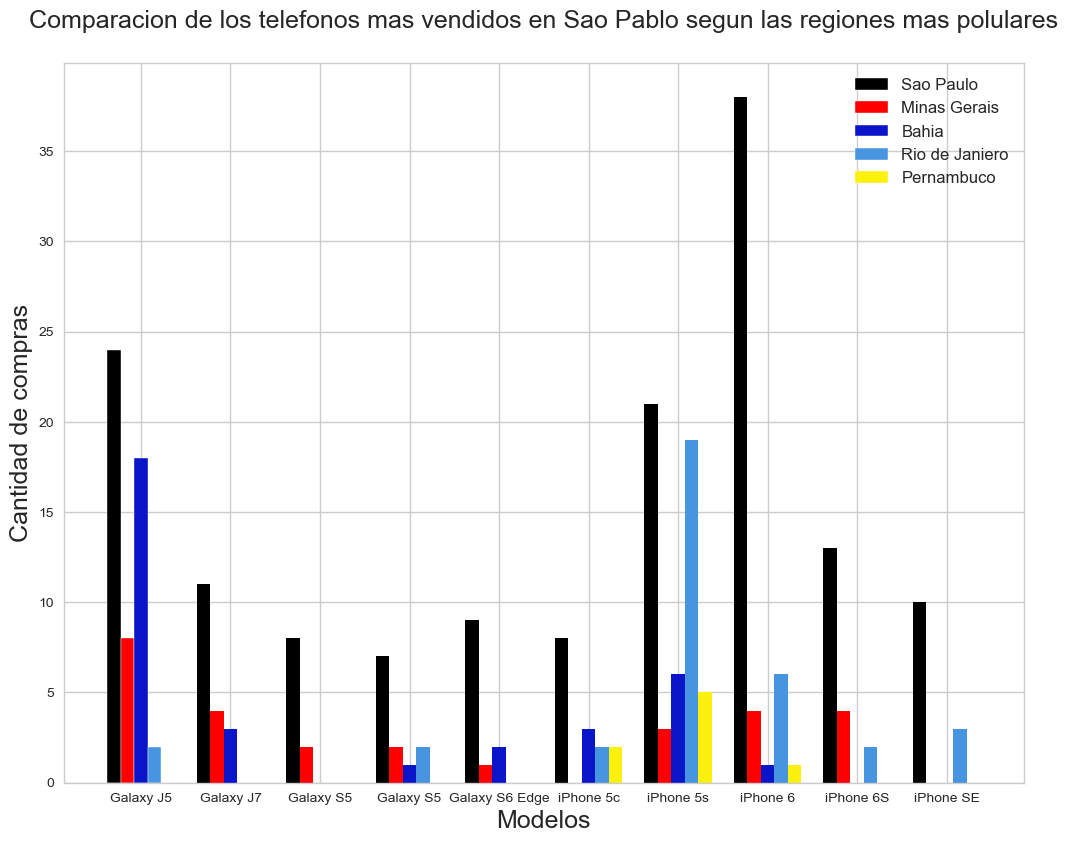

In [58]:
X = np.arange (len(lista))
Y1 = sao_paulo.values
Y2 = minas_gerais.values
Y3 = bahia.values
Y4 = rio_de_janeiro.values
Y5 = pernambuco.values



plt.axes([0.025,0.025,1.5,1.5])
plt.bar(X-0.3 ,Y1,facecolor = "#000000",label = "Sao Paulo", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X-0.15,Y2,facecolor = "#ff0000",label = "Minas Gerais", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X ,Y3,facecolor = "#0a14c8",label = "Bahia", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X+0.15,Y4,facecolor = "#4795e0",label = "Rio de Janiero", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X+0.3 ,Y5,facecolor = "#fcf10c",label = "Pernambuco", width = 0.15, align = "center",edgecolor = "white")

nombres = ['Galaxy J5', 'Galaxy J7', 'Galaxy S5', 'Galaxy S5', 'Galaxy S6 Edge', 'iPhone 5c', 'iPhone 5s', 'iPhone 6',
     'iPhone 6S', 'iPhone SE']

plt.xticks(X,nombres,fontsize = 10)
plt.xlabel("Modelos",fontsize = 18)
plt.ylabel('Cantidad de compras', fontsize = 18)

plt.title('Comparacion de los telefonos mas vendidos en Sao Pablo segun las regiones mas polulares\n', fontsize = 18)

plt.legend(loc="upper right",fontsize = 12)
plt.show()